       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

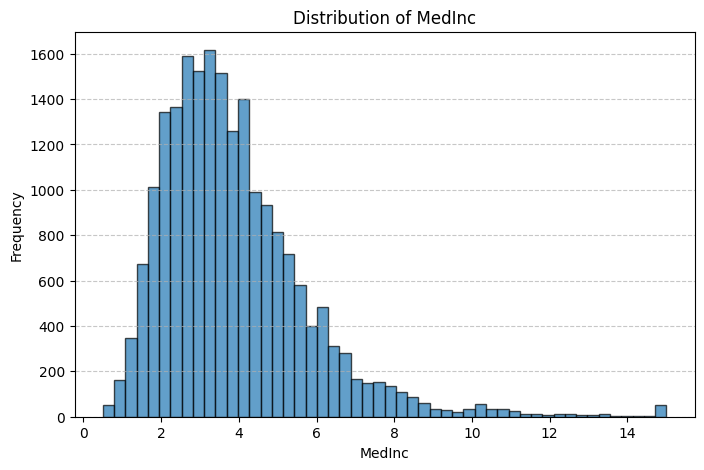

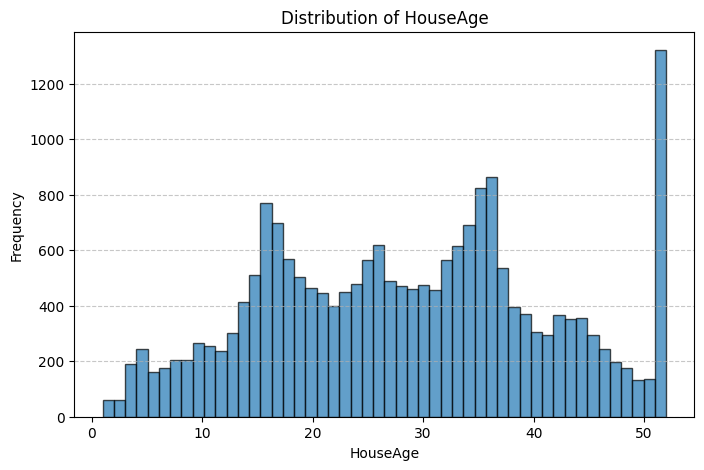

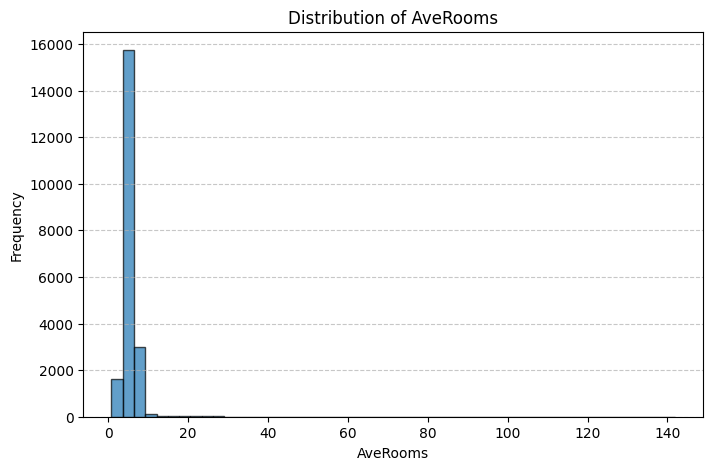

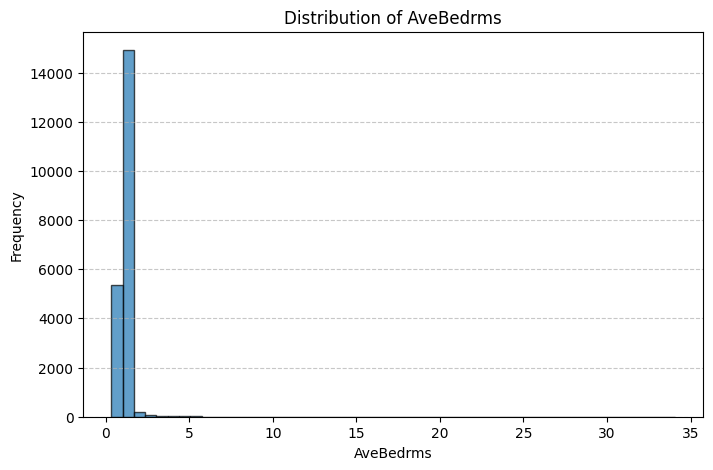

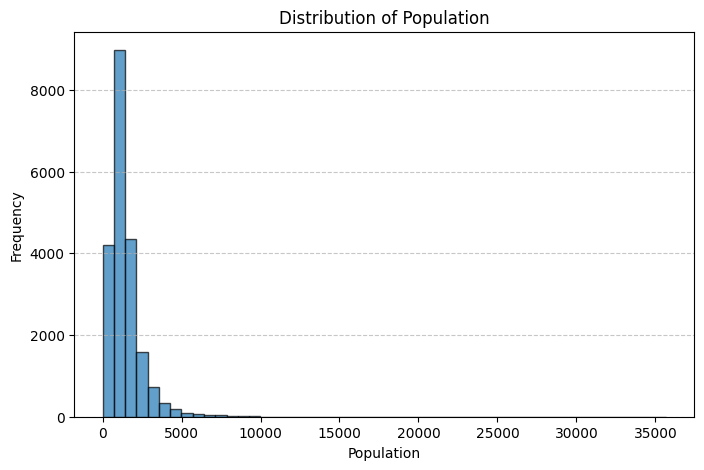

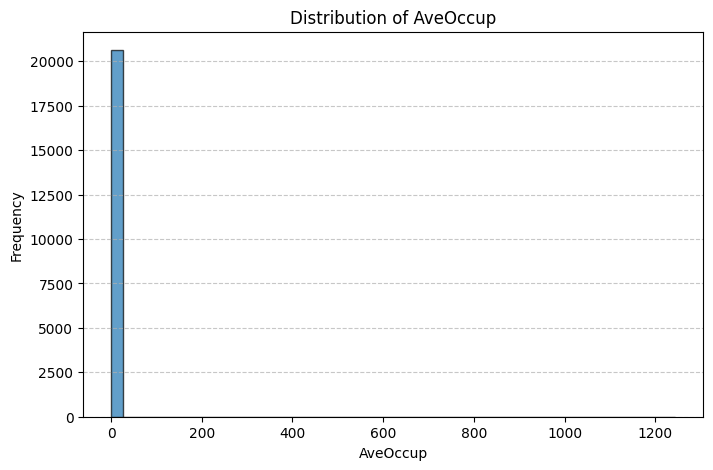

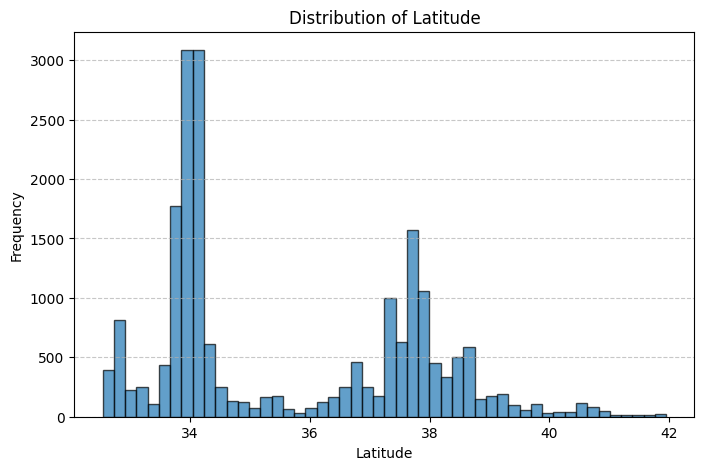

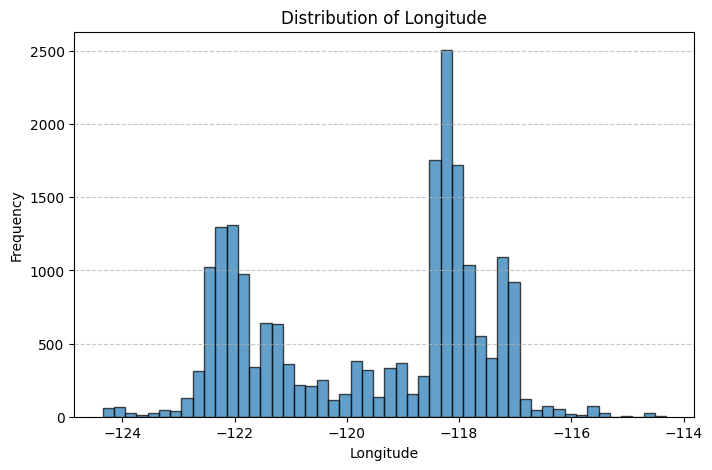

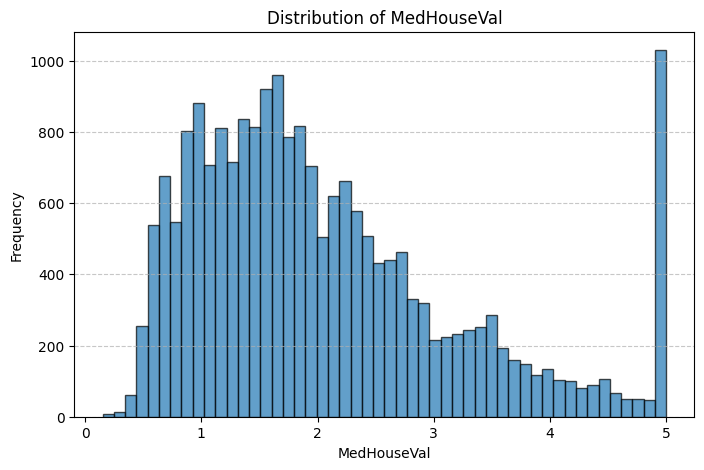

Creating box plots for all numerical features to identify outliers...


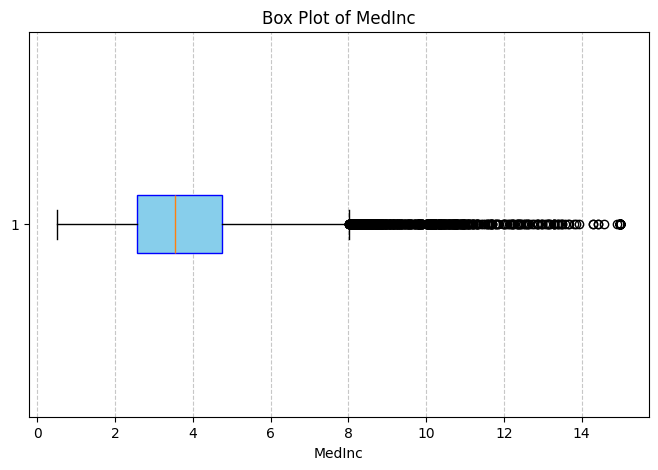

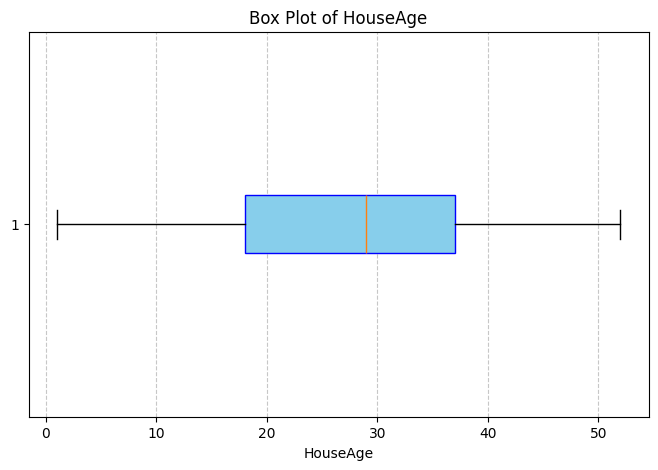

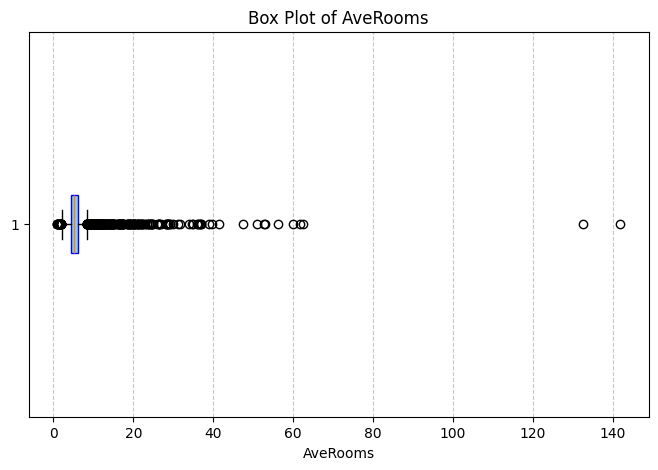

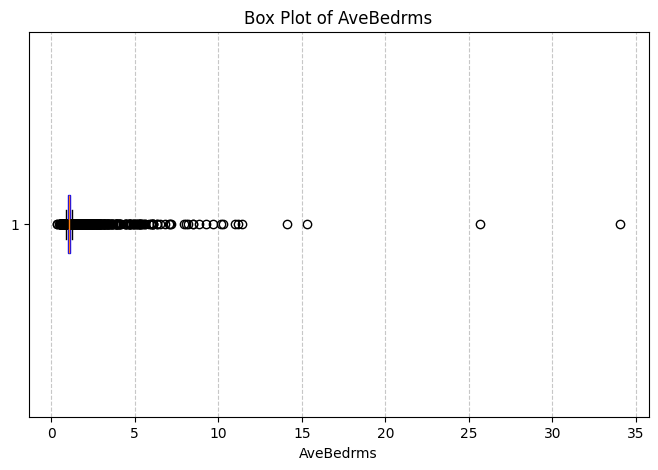

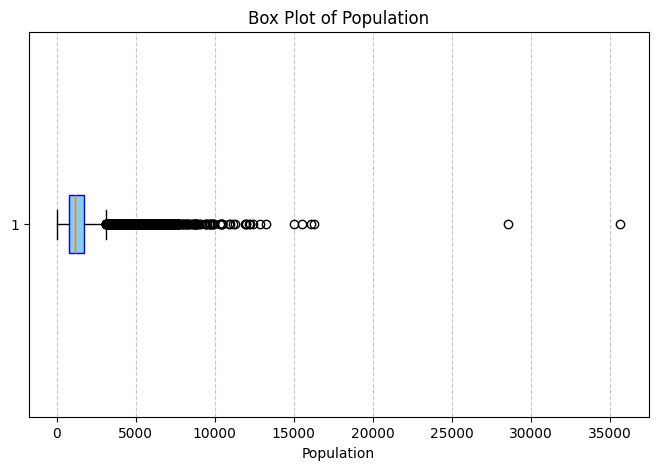

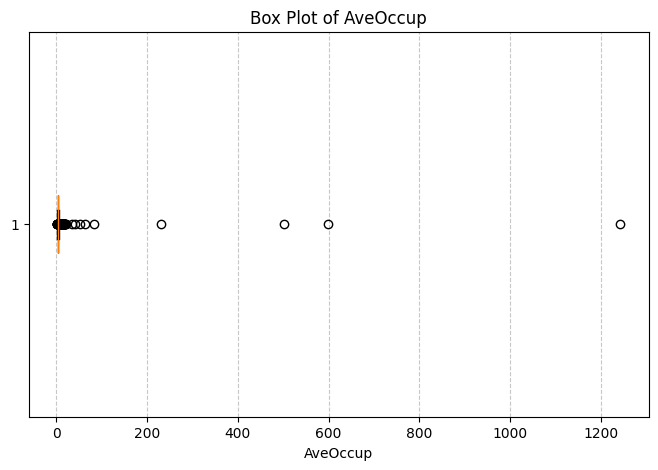

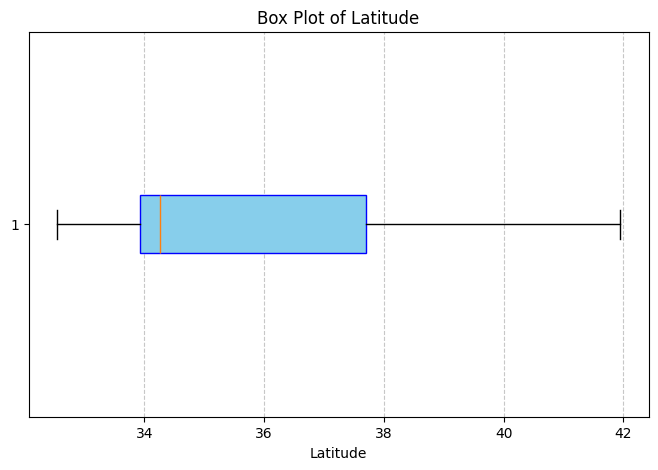

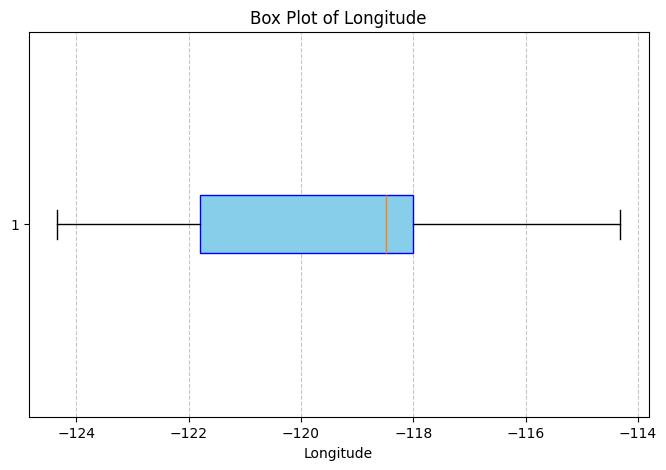

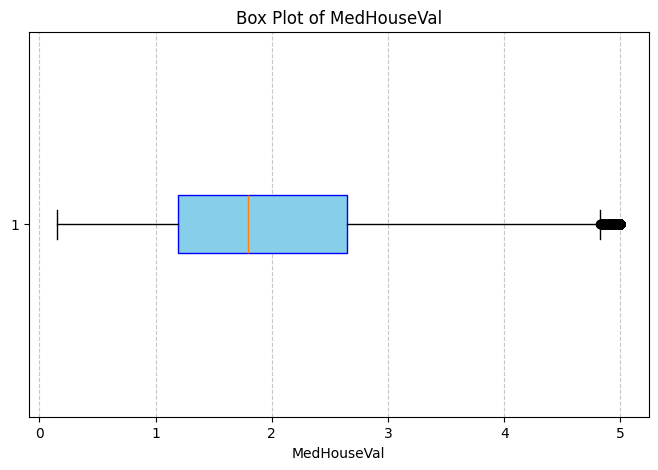

Identifying potential outliers using the IQR method...
MedHouseVal:
Lower Bound: -0.9808749999999995, Upper Bound: 4.824124999999999
Number of outliers: 1071
---


In [1]:
'''Program 1'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

housing_data = fetch_california_housing(as_frame=True)
data = housing_data['data']
print(data)
data['MedHouseVal'] = housing_data['target']

print("Creating histograms for all numerical features...")
for column in data.columns:
    plt.figure(figsize=(8, 5))
    plt.hist(data[column], bins=50, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

print("Creating box plots for all numerical features to identify outliers...")
for column in data.columns:
    plt.figure(figsize=(8, 5))
    plt.boxplot(data[column], vert=False, patch_artist=True,
    boxprops=dict(facecolor='skyblue', color='blue'))
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

print("Identifying potential outliers using the IQR method...")
outliers = {}
for column in data.columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[column] = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
print(f"{column}:")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
print(f"Number of outliers: {len(outliers[column])}")
print("---")

Computing the correlation matrix...
               MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge    -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms     0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms   -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population   0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup     0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude    -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude   -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
MedHouseVal  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

             Latitude  Longitude  MedHouseVal  
MedInc      -0.079809  -0.015176     0.688075  
HouseAge     0.011173  -0.108197     0.105623  
AveRooms     0.106389  -0.027540     0.

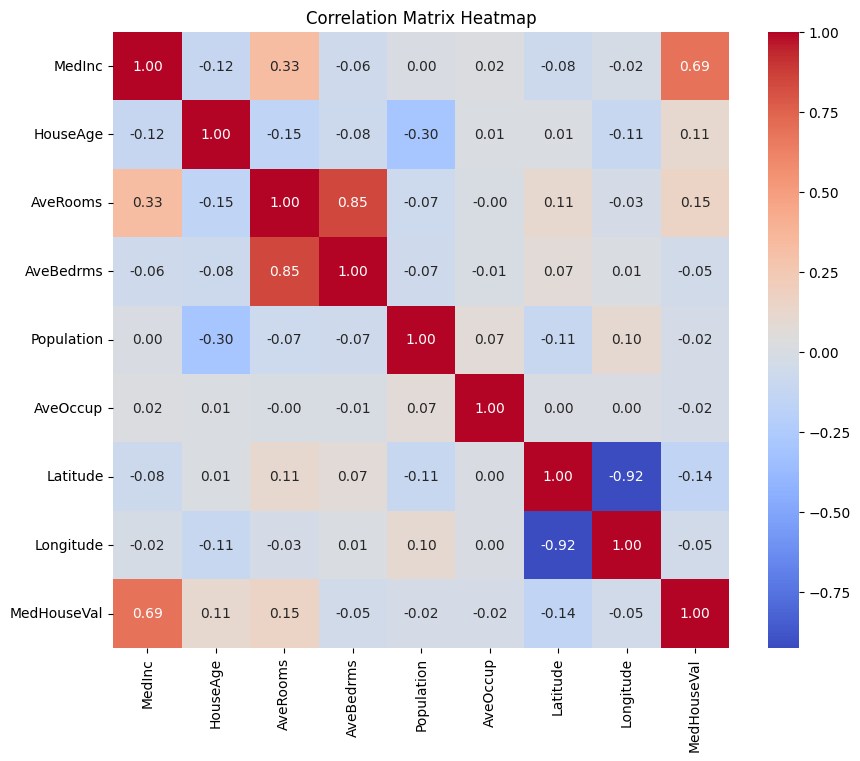

Creating a pair plot to visualize pairwise relationships between features...


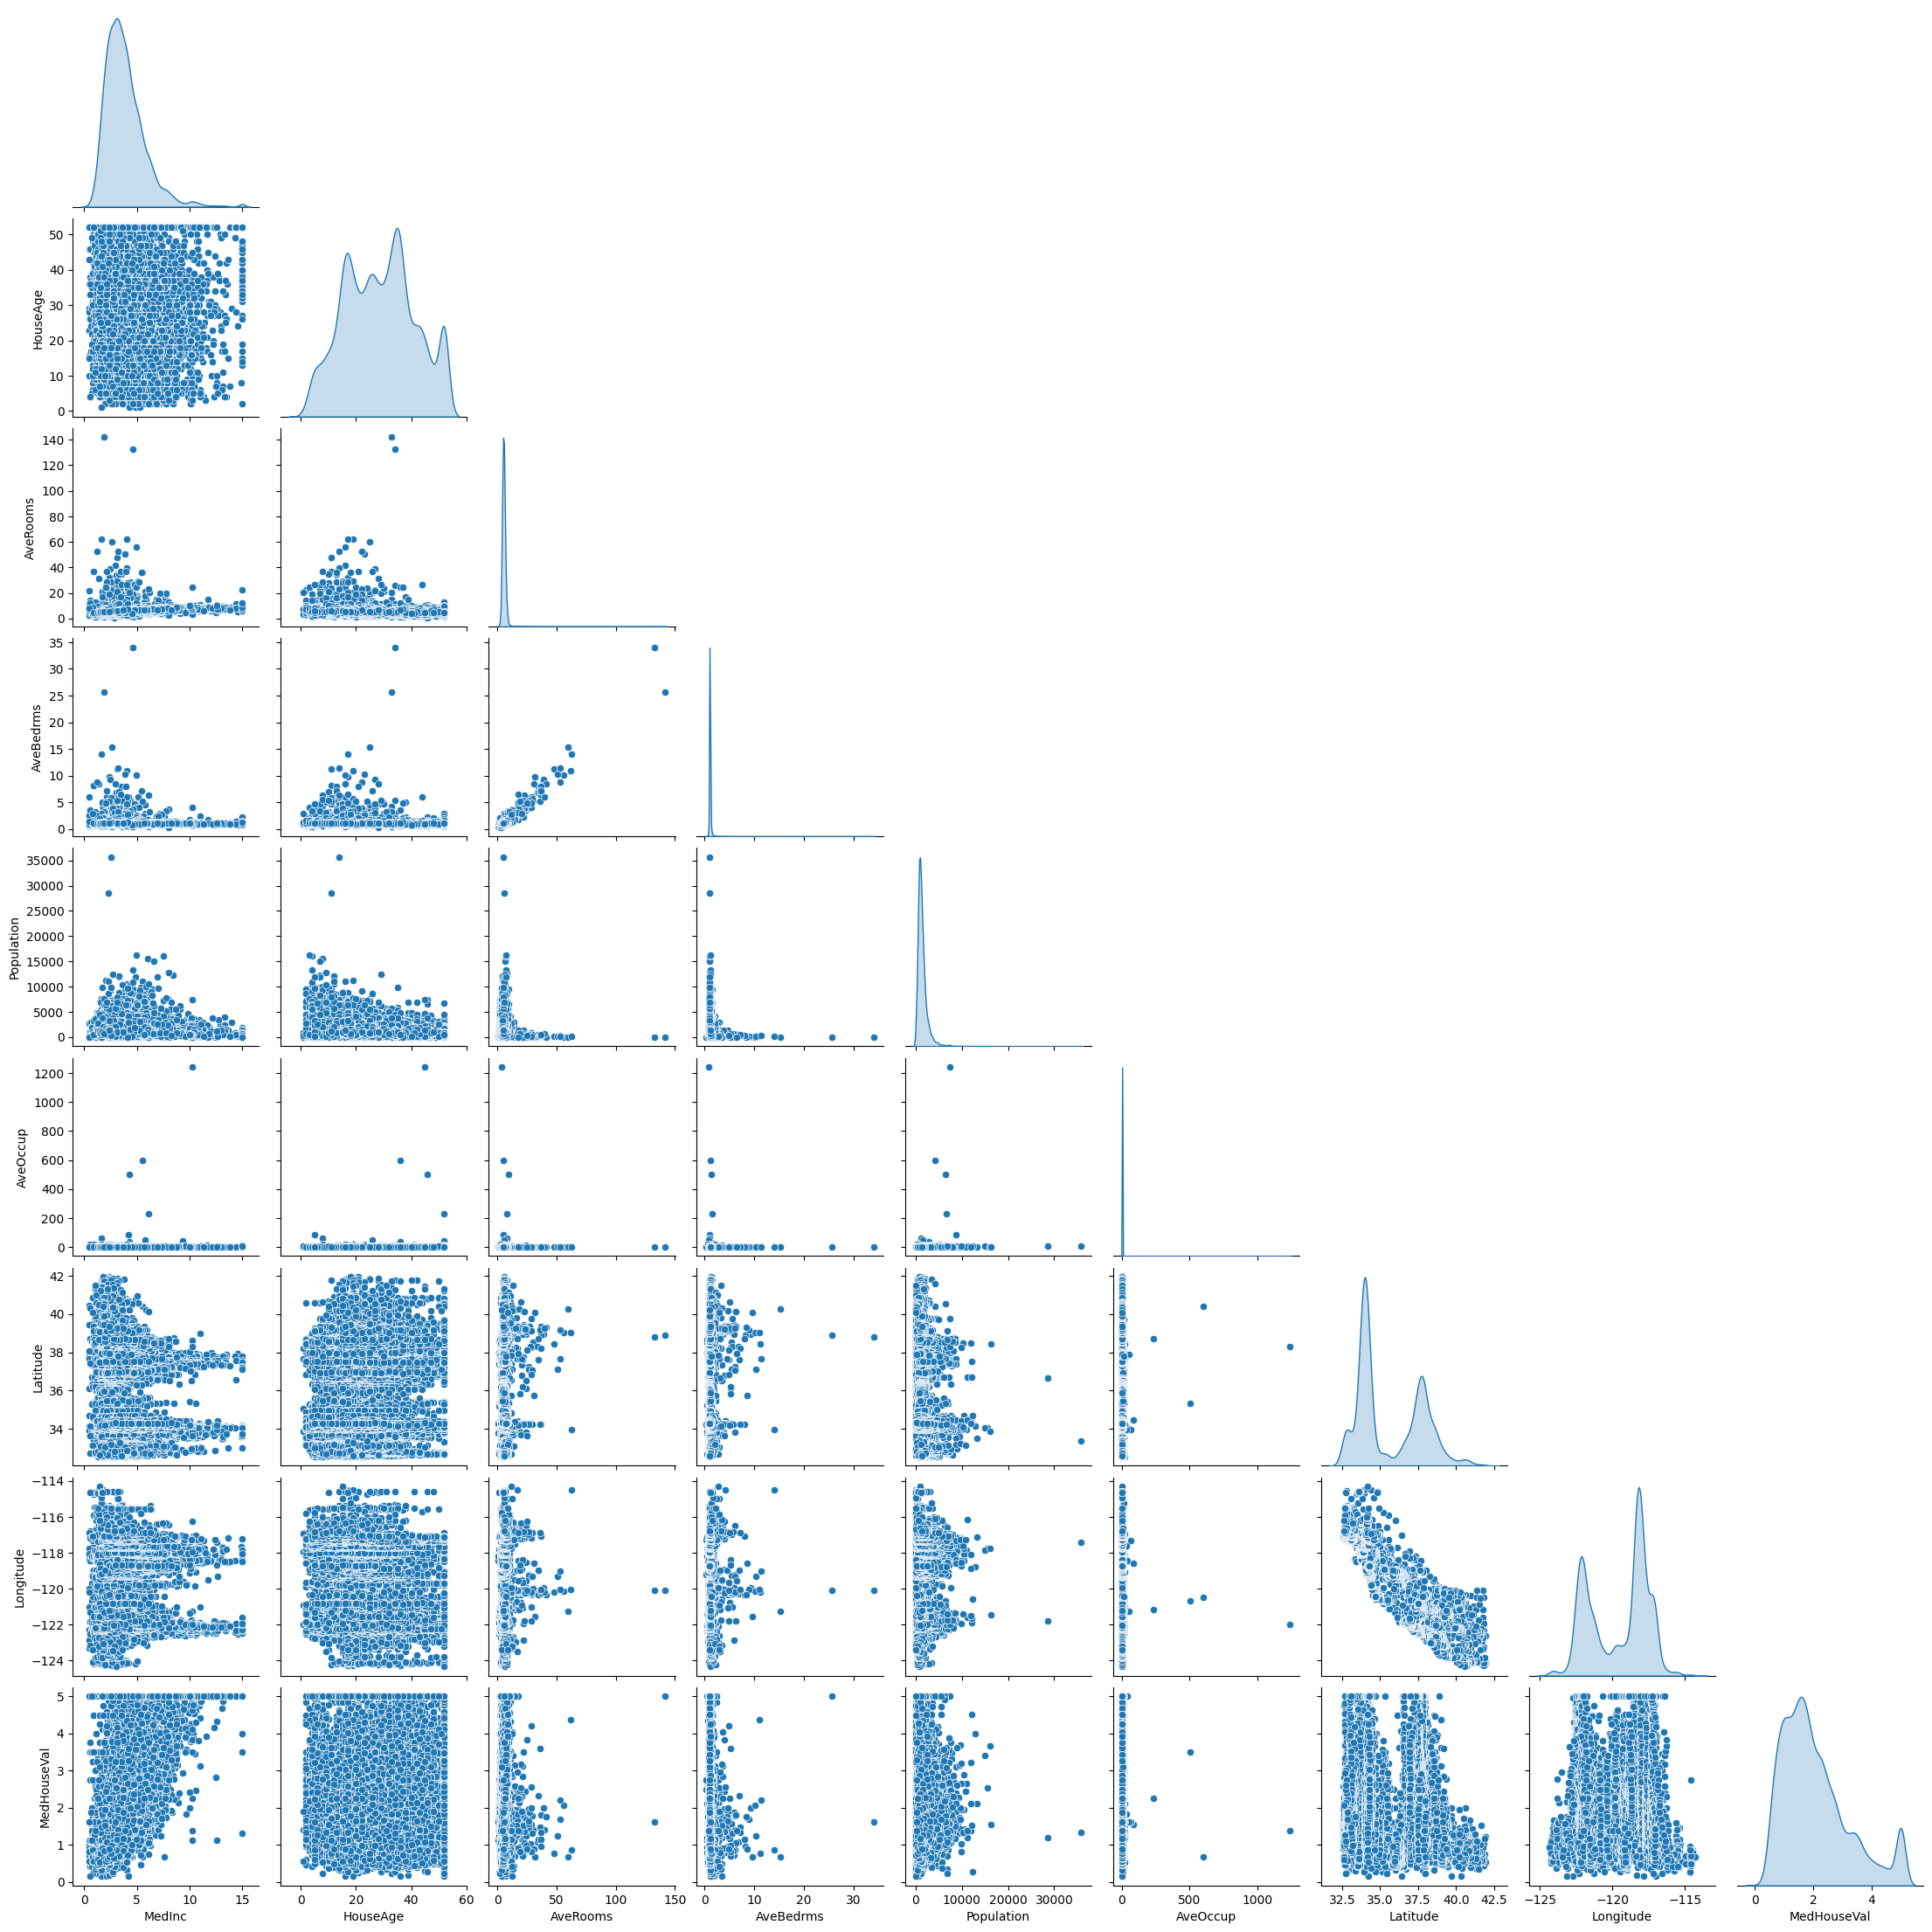

In [2]:
'''Program 2'''
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

housing_data = fetch_california_housing(as_frame=True)
data = housing_data['data']
data['MedHouseVal'] = housing_data['target'] 

print("Computing the correlation matrix...")
correlation_matrix = data.corr()
print(correlation_matrix)

print("Visualizing the correlation matrix using a heatmap...")
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm",
cbar=True, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

print("Creating a pair plot to visualize pairwise relationships between features...")
sns.pairplot(data, diag_kind='kde', corner=True)
plt.show()

Example Data (First 5 Samples):
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Standardized Example Data:
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]

Manually Computed Covariance Matrix:
[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]

Manually Computed Eigenvalues:
[2.93808505 0.9201649  0.14774182 0.02085386]

Manually Computed Eigenvectors:
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

Top 2 Eigenvectors:
[[ 0.521

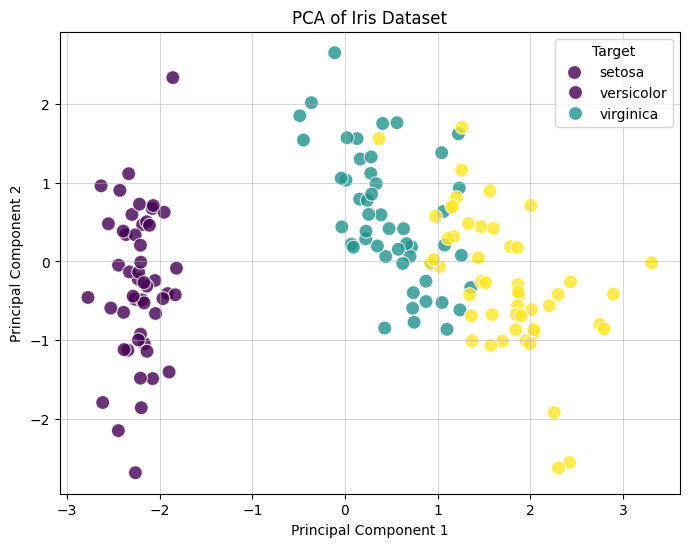

In [3]:
'''Program 3'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from numpy.linalg import eig

iris = load_iris()
iris_data = iris.data
iris_target = iris.target
iris_feature_names = iris.feature_names

df = pd.DataFrame(iris_data, columns=iris_feature_names)
df['Target'] = iris_target

example_data = iris_data[:5]
print("Example Data (First 5 Samples):")
print(example_data)

scaler = StandardScaler()
iris_data_scaled = scaler.fit_transform(iris_data)
example_data_scaled = scaler.transform(example_data)
print("\nStandardized Example Data:")
print(example_data_scaled)

n_samples = iris_data_scaled.shape[0]
mean_vector = np.mean(iris_data_scaled, axis=0)
X_centered = iris_data_scaled - mean_vector
cov_matrix_manual = (1 / (n_samples - 1)) * np.dot(X_centered.T,
X_centered)
print("\nManually Computed Covariance Matrix:")
print(cov_matrix_manual)

eigenvalues_manual, eigenvectors_manual = eig(cov_matrix_manual)
print("\nManually Computed Eigenvalues:")
print(eigenvalues_manual)
print("\nManually Computed Eigenvectors:")
print(eigenvectors_manual)

sorted_indices = np.argsort(eigenvalues_manual)[::-1]
top_2_indices = sorted_indices[:2]
top_2_eigenvectors = eigenvectors_manual[:, top_2_indices]
print("\nTop 2 Eigenvectors:")
print(top_2_eigenvectors)

iris_pca = np.dot(iris_data_scaled, top_2_eigenvectors)
example_pca = np.dot(example_data_scaled, top_2_eigenvectors)
print("\nReduced 2D Example Data:")
print(example_pca)

iris_pca_df = pd.DataFrame(data=iris_pca, columns=["Principal Component 1", "Principal Component 2"])
iris_pca_df['Target'] = iris_target

plt.figure(figsize=(8, 6))
sns.scatterplot(
x="Principal Component 1", y="Principal Component 2", hue="Target",
data=iris_pca_df,
palette="viridis", s=100, alpha=0.8
)
plt.title("PCA of Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Target", labels=iris.target_names)
plt.grid(alpha=0.5)
plt.show()

In [5]:
'''Program 4'''

import pandas as pd

print("Implementing Find-S algorithm...")

def find_s_algorithm(csv_file):
    dataset = pd.read_csv(csv_file)
    attributes = dataset.iloc[:, :-1].values
    labels = dataset.iloc[:, -1].values
    hypothesis = None

    for i in range(len(labels)):
        if labels[i].strip().lower() == 'yes':
            if hypothesis is None:
                hypothesis = list(attributes[i])
            else:
                for j in range(len(hypothesis)):
                    if hypothesis[j] != attributes[i][j]:
                        hypothesis[j] = '?'

    return hypothesis

csv_file = "finds.csv"
final_hypothesis = find_s_algorithm(csv_file)
print("Final Hypothesis:", final_hypothesis)

Implementing Find-S algorithm...
Final Hypothesis: ['?', '?', '?', '?']


[[0.37454012]
 [0.95071431]
 [0.73199394]
 [0.59865848]
 [0.15601864]]


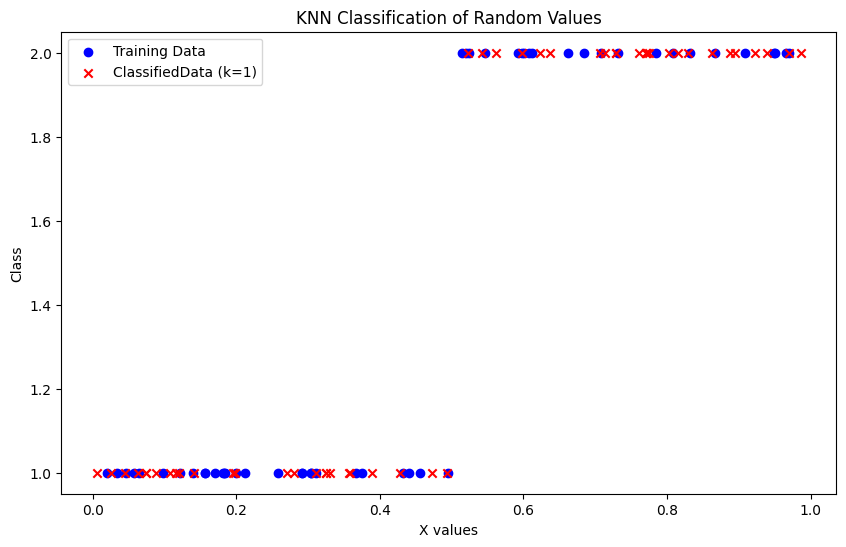

Classification results for k=1: [2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 2 1 2 1 2 2 1 1 2 2 2 2 1 1 1 2 2 1 1 1 1 2
 2 2 1 1 2 2 2 2 1 2 1 1 1]
Classification results for k=2: [2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 2 1 2 1 2 2 1 1 2 2 2 2 1 1 1 2 2 1 1 1 1 2
 2 2 1 1 2 2 2 2 1 2 1 1 1]
Classification results for k=3: [2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 2 1 2 1 2 2 1 1 2 2 2 2 1 1 1 2 2 1 1 1 1 2
 2 2 1 1 2 2 2 2 2 2 1 1 1]
Classification results for k=4: [2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 2 1 2 1 2 2 1 1 2 2 2 2 1 1 1 2 2 1 1 1 1 2
 2 2 1 1 2 2 2 2 2 2 1 1 1]
Classification results for k=5: [2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 2 1 2 1 2 2 1 1 2 2 2 2 1 1 1 2 2 1 1 1 1 2
 2 2 1 1 2 2 2 2 2 2 1 1 1]
Classification results for k=20: [2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 2 1 2 1 2 2 1 1 2 2 2 2 1 1 1 2 2 1 1 1 1 2
 2 2 1 1 2 2 2 2 2 2 1 1 1]
Classification results for k=30: [2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 2 1 2 1 2 2 1 1 2 2 2 2 1 1 1 2 2 1 1 1 1 2
 2 2 1 1 2 2 2 2 1 2 1 1 1]


In [5]:
'''Program 5'''
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(42)
x = np.random.rand(100).reshape(-1, 1)
print(x[:5])

labels = np.array([1 if xi <= 0.5 else 2 for xi in x[:50]])

k_values = [1, 2, 3, 4, 5, 20, 30]
classified_labels = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x[:50], labels) 
    classified_labels[k] = knn.predict(x[50:]) 

plt.figure(figsize=(10, 6))
plt.scatter(x[:50], labels, color='blue', label='Training Data')
plt.scatter(x[50:], classified_labels[1], color='red', marker='x', label='ClassifiedData (k=1)')
plt.xlabel('X values')
plt.ylabel('Class')
plt.title('KNN Classification of Random Values')
plt.legend()
plt.show()

for k in k_values:
    print(f"Classification results for k={k}: {classified_labels[k]}")

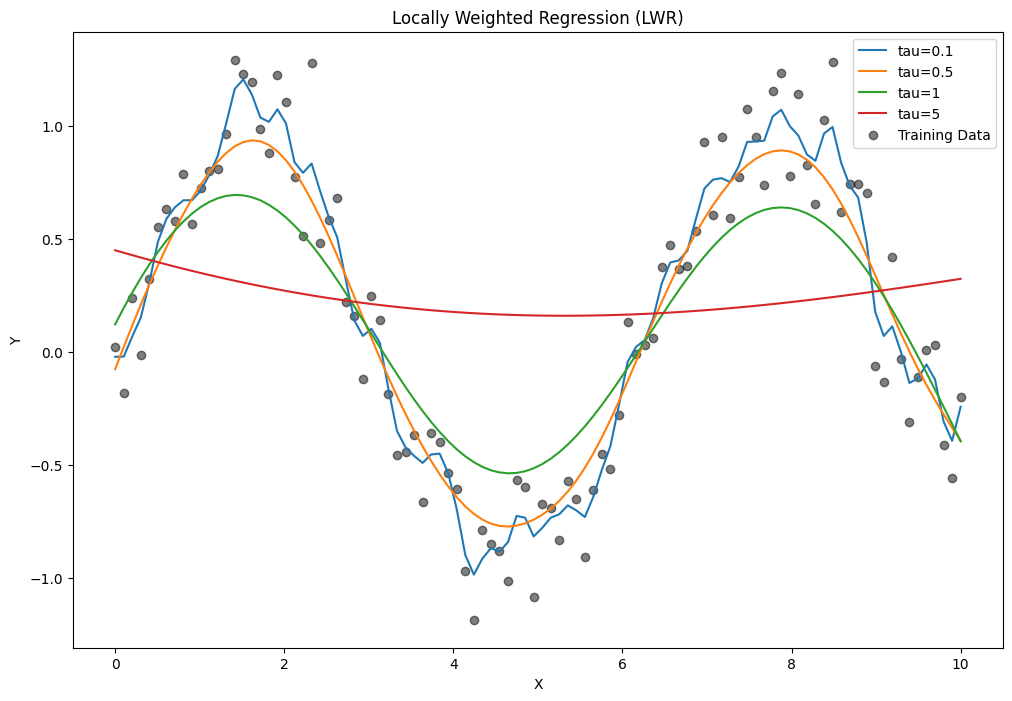

In [1]:
'''Program 6'''
import numpy as np
import matplotlib.pyplot as plt
def lwr(x, y, xq, tau):
    W = np.diag(np.exp(-(x - xq)**2 / (2 * tau**2)))
    X = np.c_[np.ones(len(x)), x]
    theta = np.linalg.pinv(X.T @ W @ X) @ (X.T @ W @ y)
    return np.array([1, xq]) @ theta
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(0, 0.2, 100)
x_test = np.linspace(0, 10, 100)
taus = [0.1, 0.5, 1, 5]
plt.figure(figsize=(12, 8))
for tau in taus:
    y_pred = [lwr(x, y, xq, tau) for xq in x_test]
    plt.plot(x_test, y_pred, label=f'tau={tau}')
plt.scatter(x, y, c='k', alpha=0.5, label='Training Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Locally Weighted Regression (LWR)')
plt.legend()
plt.show()

In [6]:
'''Program 7'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

boston_df=pd.read_csv("boston_housing.csv")
print("Boston csv Colums: ", boston_df.columns)

Boston csv Colums:  Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [7]:
X_boston=boston_df[['RM']]
y_boston=boston_df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X_boston, y_boston, test_size=0.2, random_state=42)
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred=linear_reg.predict(X_test)

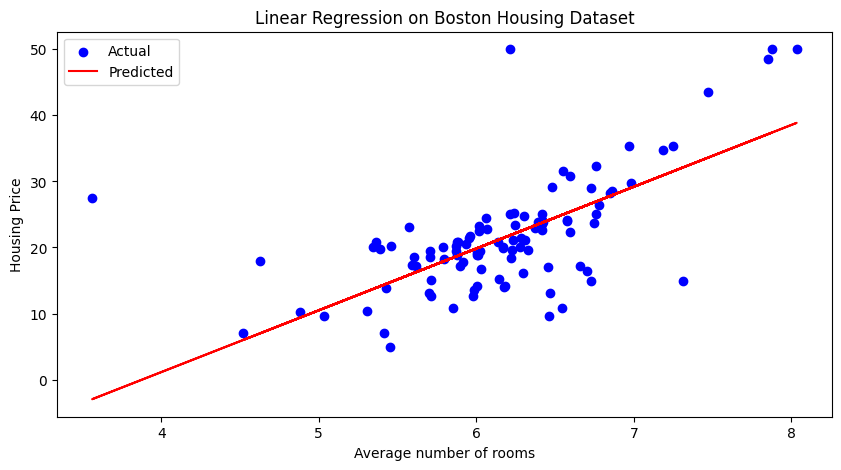

Mean Squared Error: 46.144775347317264


In [9]:
plt.figure(figsize=(10,5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Average number of rooms')
plt.ylabel('Housing Price')
plt.title('Linear Regression on Boston Housing Dataset')
plt.legend()
plt.show()

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")

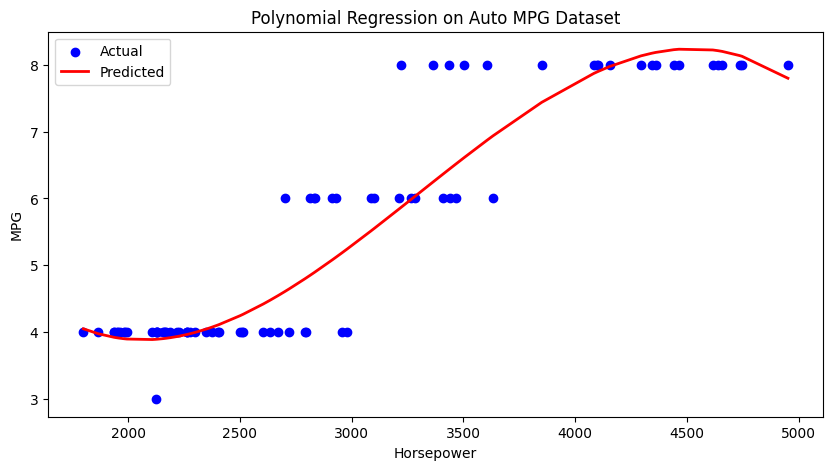

Mean Squared Error (Polynomial Regression): 0.3778474151091915


In [13]:
auto_mpg_url= "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight','acceleration', 'model_year', 'origin']

auto_df = pd.read_csv(auto_mpg_url, sep=r'\s+', names=column_names, na_values='?')
auto_df=auto_df.dropna()

X_auto=auto_df[['horsepower']].astype(float).values
y_auto=auto_df['mpg'].values

X_train, X_test, y_train, y_test = train_test_split(X_auto, y_auto, test_size=0.2, random_state=42)

poly_model=make_pipeline(PolynomialFeatures(degree=3), StandardScaler(), LinearRegression())
poly_model.fit(X_train, y_train)
y_poly_pred=poly_model.predict(X_test)

X_test_sorted, y_poly_pred_sorted = zip(*sorted(zip(X_test.flatten(),y_poly_pred)))

plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test_sorted, y_poly_pred_sorted, color='red', linewidth=2,
label='Predicted')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Polynomial Regression on Auto MPG Dataset')
plt.legend()
plt.show()
print(f"Mean Squared Error (Polynomial Regression): {mean_squared_error(y_test, y_poly_pred)}")

In [11]:
'''Program 8'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from collections import Counter

data=load_breast_cancer()
X=data.data
y=data.target
feature_names=data.feature_names
target_names=data.target_names
print("Feature Names: ", feature_names)
print("Target Names: ", target_names)
def calculate_entropy(labels):
    total=len(labels)
    counts=Counter(labels)
    entropy=0.0
    for count in counts.values():
        p=count/total
        entropy -= p*np.log2(p)
    return entropy
entropy_dataset=calculate_entropy(y)
print(f"\n Overall Entropy of Target (Malignant vs Benign): {entropy_dataset:.4f}")

Feature Names:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target Names:  ['malignant' 'benign']

 Overall Entropy of Target (Malignant vs Benign): 0.9526


In [12]:
print("\nInformation Gain for Each Feature (using Median Split):")
for i, feature in enumerate(feature_names):
    feature_values=X[:,i]
    median_value=np.median(feature_values)
    left_mask=feature_values<=median_value
    right_mask=feature_values>median_value
    y_left=y[left_mask]
    y_right=y[right_mask]
    entropy_left=calculate_entropy(y_left)
    entropy_right=calculate_entropy(y_right)
    weighted_entropy=(len(y_left)/len(y)) * entropy_left + (len(y_right)/len(y)) * entropy_right
    info_gain=entropy_dataset - weighted_entropy
    print(f"{feature}: IG = {info_gain: .4f}")


Information Gain for Each Feature (using Median Split):
mean radius: IG =  0.3416
mean texture: IG =  0.1445
mean perimeter: IG =  0.3507
mean area: IG =  0.3416
mean smoothness: IG =  0.0660
mean compactness: IG =  0.2325
mean concavity: IG =  0.3695
mean concave points: IG =  0.3995
mean symmetry: IG =  0.0627
mean fractal dimension: IG =  0.0000
radius error: IG =  0.1824
texture error: IG =  0.0000
perimeter error: IG =  0.2192
area error: IG =  0.2910
smoothness error: IG =  0.0023
compactness error: IG =  0.0990
concavity error: IG =  0.1601
concave points error: IG =  0.1445
symmetry error: IG =  0.0037
fractal dimension error: IG =  0.0284
worst radius: IG =  0.4588
worst texture: IG =  0.1298
worst perimeter: IG =  0.4436
worst area: IG =  0.4556
worst smoothness: IG =  0.0990
worst compactness: IG =  0.1882
worst concavity: IG =  0.3792
worst concave points: IG =  0.4209
worst symmetry: IG =  0.0762
worst fractal dimension: IG =  0.0452



Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy: 0.956140350877193


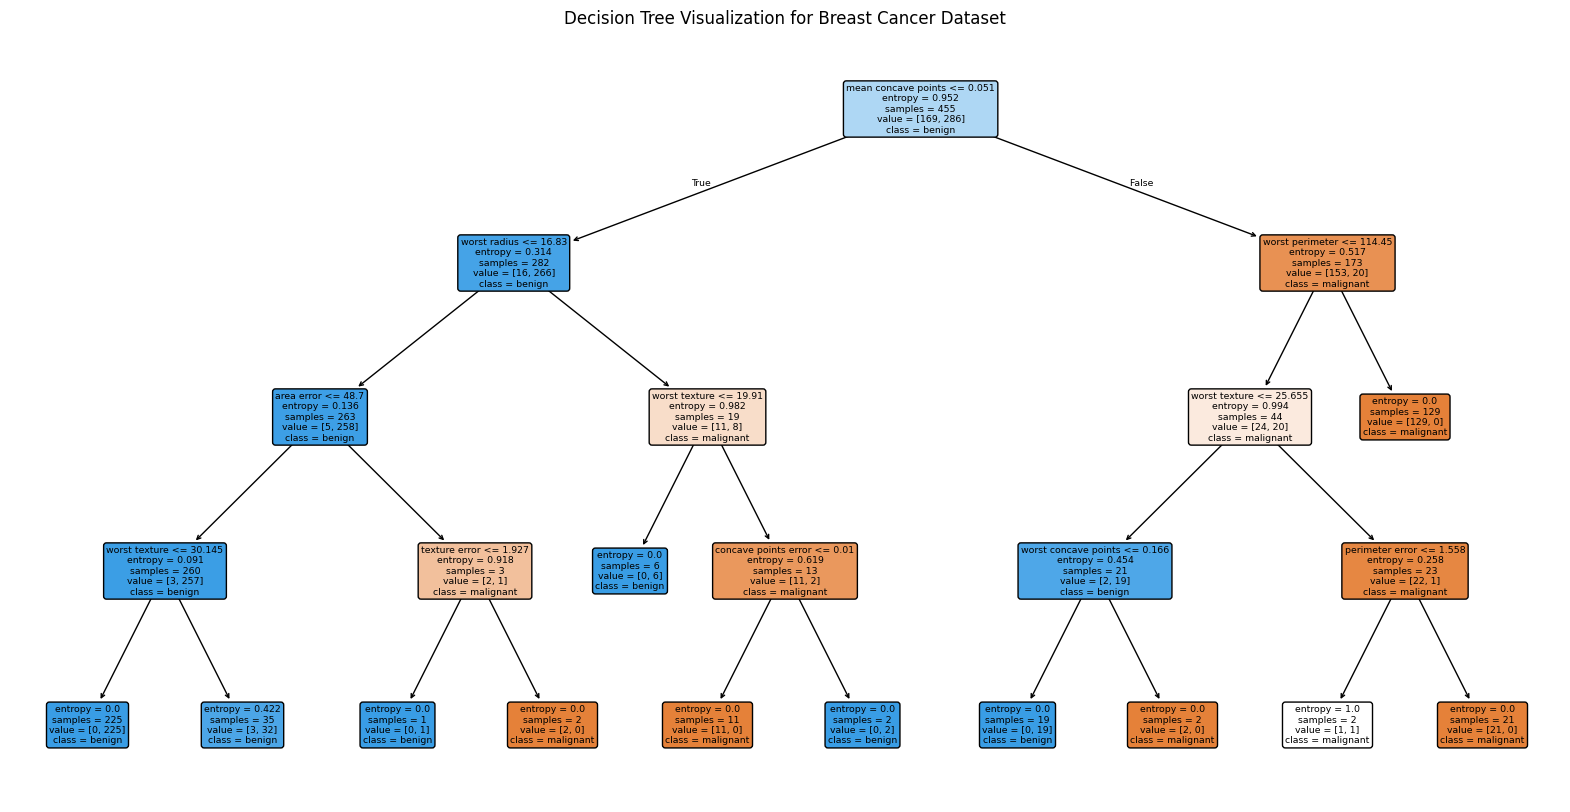

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4,random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=feature_names, class_names=target_names, filled=True, rounded=True)
plt.title("Decision Tree Visualization for Breast Cancer Dataset")
plt.show()

In [14]:
new_sample = np.array([[17.99, 10.38, 122.8, 1001.0, 0.1184,
0.2776, 0.3001, 0.1471, 0.2419, 0.07871,
1.095, 0.9053, 8.589, 153.4, 0.006399,
0.04904, 0.05373, 0.01587, 0.03003, 0.006193,
25.38, 17.33, 184.6, 2019.0, 0.1622,
0.6656, 0.7119, 0.2654, 0.4601, 0.1189]])
prediction = clf.predict(new_sample)
print("\nPrediction for new sample:")
print("Class:", target_names[prediction[0]])


Prediction for new sample:
Class: malignant


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/anurag/scikit_learn_data

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      0.67      0.80         3
           2       0.43      1.00      0.60         3
           3       1.00      0.33      0.50         3
           4       1.00      0.33      0.50         3
           5       1.00      1.00      1.00         3
           6       1.00      0.67      0.80         3
           7       0.60      1.00      0.75         3
           8       1.00      1.00      1.00         3
           9       1.00      0.33      0.50         3
          10       1.00      0.67      0.80         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         3
          13       1.00      0.67      0.80         3
          14       1.00      1.00      1.00         

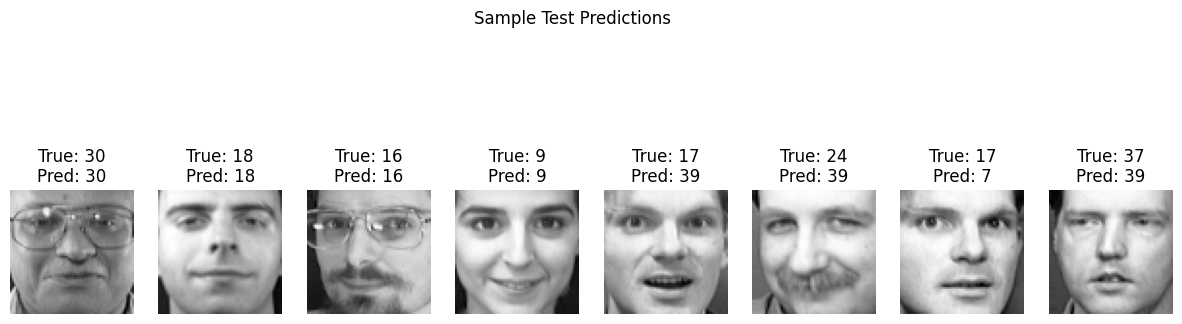

In [11]:
'''Program 9'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

faces = fetch_olivetti_faces()
X = faces.data
y = faces.target
images = faces.images

X_train, X_test, y_train, y_test, img_train, img_test = train_test_split(X, y, images, test_size=0.3, random_state=42, stratify=y)
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))
print("Accuracy:", accuracy)
def show_predictions(images, true_labels, predicted_labels, n=8):
    plt.figure(figsize=(15, 5))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}")
        plt.axis('off')
    plt.suptitle("Sample Test Predictions")
    plt.show()
show_predictions(img_test, y_test, y_pred, n=8)

In [16]:
'''Program 10'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

data=load_breast_cancer()
X=data.data
y=data.target

feature_names=data.feature_names
target_names=data.target_names

print('Data Shape: ', X.shape)
print('Target: ', target_names)

Data Shape:  (569, 30)
Target:  ['malignant' 'benign']


In [17]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
kmeans=KMeans(n_clusters=2, random_state=42, n_init=10)
clusters=kmeans.fit_predict(X_scaled)
labels_mapped=np.where(clusters==0,1,0)

In [18]:
print("Accuracy Score: ", accuracy_score(y, labels_mapped))
print("Confusion Matrix: \n", confusion_matrix(y, labels_mapped))

Accuracy Score:  0.9050966608084359
Confusion Matrix: 
 [[176  36]
 [ 18 339]]


In [19]:
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)

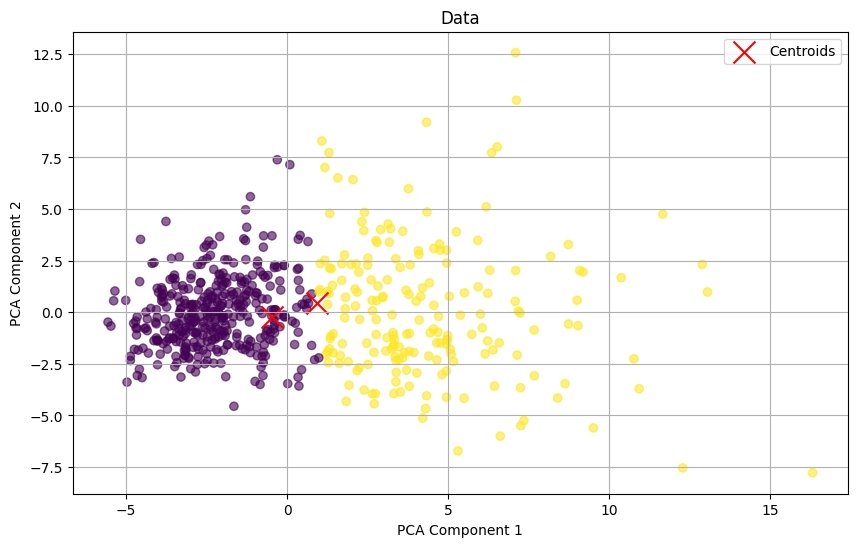

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='x', s=250, label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Data')
plt.legend()
plt.grid(True)
plt.show()